## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Convolutional Neural networks with Ciphar dataset

**Imports**

In [1]:
from keras.datasets import cifar10
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


**Dataset**



1.   A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).
2.   The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.
3.  The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares.









In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


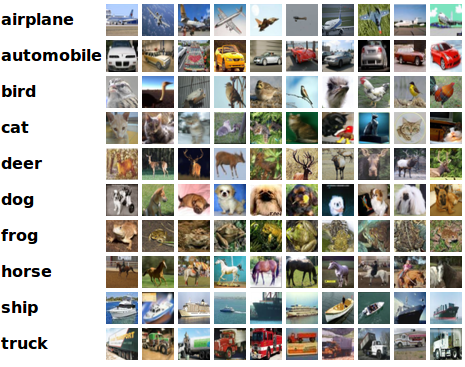

In [0]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/SSDL/Day2/Image/ciphar.png"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


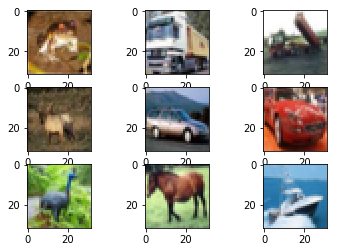

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [4]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Pre-Processing**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
import keras
from keras import layers
from keras import models

**LeNet Model**

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dens

**Keras Callbacks**

In [0]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
#tensorboard --logdir=F:\logs\logs
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
mc = ModelCheckpoint('Models/cnn_mnist_ciphar10_Adam.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='Models/logs', write_graph=True,write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('Models/cnn_mnist_ciphar10_Adam.csv',append=True)
ea = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
#history=model.fit(X_train, y_train, validation_split=(0.2), epochs=15, batch_size=32,verbose=2)

In [12]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=15, batch_size=32,verbose=2,callbacks=[cv,mc,tb])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 1.7027 - acc: 0.3799 - val_loss: 1.4926 - val_acc: 0.4579
Epoch 2/15
 - 6s - loss: 1.4260 - acc: 0.4860 - val_loss: 1.3756 - val_acc: 0.5055
Epoch 3/15
 - 6s - loss: 1.3220 - acc: 0.5211 - val_loss: 1.3614 - val_acc: 0.5150
Epoch 4/15
 - 7s - loss: 1.2585 - acc: 0.5493 - val_loss: 1.2916 - val_acc: 0.5390
Epoch 5/15
 - 6s - loss: 1.2014 - acc: 0.5712 - val_loss: 1.2509 - val_acc: 0.5622
Epoch 6/15
 - 6s - loss: 1.1547 - acc: 0.5866 - val_loss: 1.2586 - val_acc: 0.5540
Epoch 7/15
 - 6s - loss: 1.1076 - acc: 0.6037 - val_loss: 1.2201 - val_acc: 0.5715
Epoch 8/15
 - 6s - loss: 1.0635 - acc: 0.6222 - val_loss: 1.2042 - val_acc: 0.5827
Epoch 9/15
 - 6s - loss: 1.0256 - acc: 0.6335 - val_loss: 1.1956 - val_acc: 0.5869
Epoch 10/15
 - 6s - loss: 0.9920 - acc: 0.6460 - val_loss: 1.1812 - val_acc: 0.5909
Epoch 11/15
 - 6s - loss: 0.9488 - acc: 0.6626 - val_loss: 1.1869 - val

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.223328485107422
Test accuracy: 0.5835


**Loss and Accuracy Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(15)

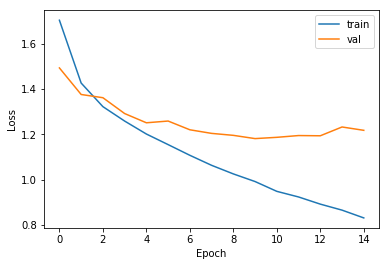

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

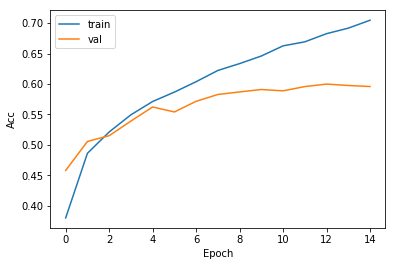

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Saving and loading models**

In [0]:
from keras.models import load_model
#model2 = model.save('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist1.h5')
model2 = load_model("/content/drive/My Drive/SSDL/Day2/Models/cnn_mnist_ciphar10_Adam.h5")

#### Prediction on Test Image




In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[101].reshape(32,32,3)) #100
pred = model.predict(X_test[101].reshape(1,32, 32, 3))
print(pred.argmax())
print(pred)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
    plt.imshow(X_test[i].reshape(32, 32, 3),cmap='Greys')
    pred = model.predict(X_test[i].reshape(1, 32, 32, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is "+str(pred.argmax()))

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import numpy as np

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()